In [17]:
import sys
import pandas as pd

from src import load_clean_data, load_raw_data, plot_distributions,save_processed_data,detect_outliers, create_insightful_visuals
sys.path.append("../src")
file_path  = '../data/raw/MachineLearningRating_v3.txt'
insurance_df = load_raw_data(file_path)
insurance_df.head()

INFO:src.utils.load_data:Loaded 1000098 records from ../data/raw/MachineLearningRating_v3.txt.


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,9.000000e-13
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.000000e+00
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.000000e+00
3,1452155,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.000000e+00
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.000000e+00


In [21]:


vehicle_type_mode = insurance_df['VehicleType'].mode()[0]
insurance_df['VehicleType'] = insurance_df['VehicleType'].fillna(vehicle_type_mode)
insurance_df['CustomValueEstimate'] = insurance_df.groupby('VehicleType')['CustomValueEstimate'].transform(lambda x: x.fillna(x.median()))
# Impute categorical columns
for col in ['Gender', 'MaritalStatus', 'Bank', 'AccountType', 'WrittenOff', 'Rebuilt', 'Converted']:
    insurance_df[col] = insurance_df[col].fillna(insurance_df[col].mode()[0])
for col in ['mmcode', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate']:
    insurance_df[col] = insurance_df[col].fillna(insurance_df[col].mode()[0])
# Impute numerical columns
for col in ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CapitalOutstanding']:
    insurance_df[col] = pd.to_numeric(insurance_df[col], errors='coerce')
    insurance_df[col] = insurance_df[col].fillna(int(insurance_df[col].median()))
    insurance_df['NewVehicle'] = insurance_df['NewVehicle'].fillna(
    insurance_df['RegistrationYear'].apply(lambda x: 'Yes' if x >= 2023 else 'No'))

insurance_df = insurance_df.drop('NumberOfVehiclesInFleet', axis=1)
insurance_df = insurance_df.drop('CrossBorder', axis=1)
insurance_df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

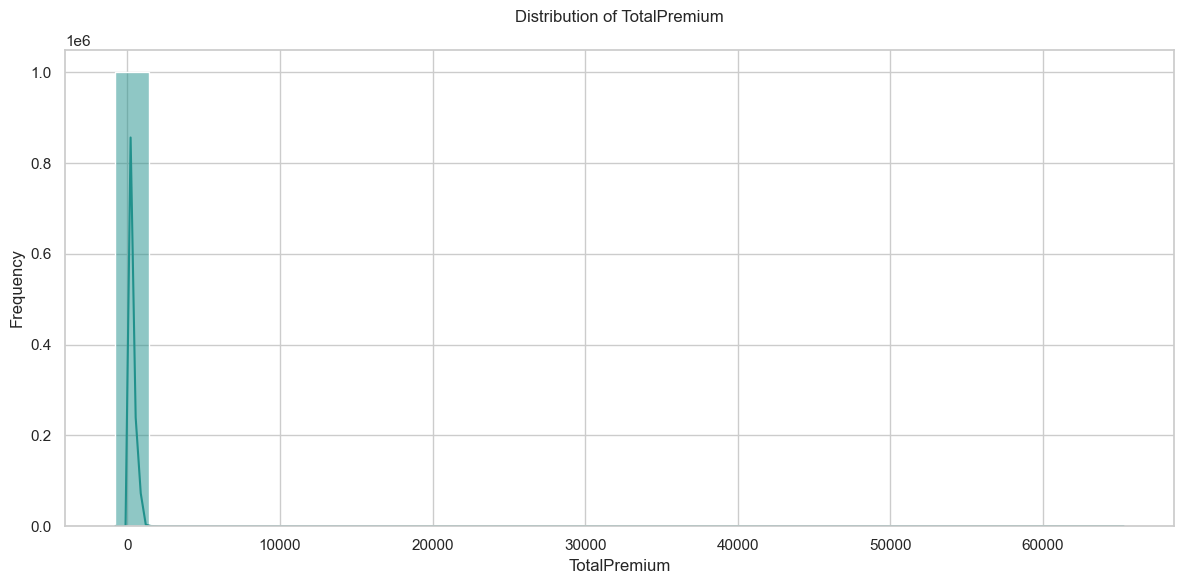

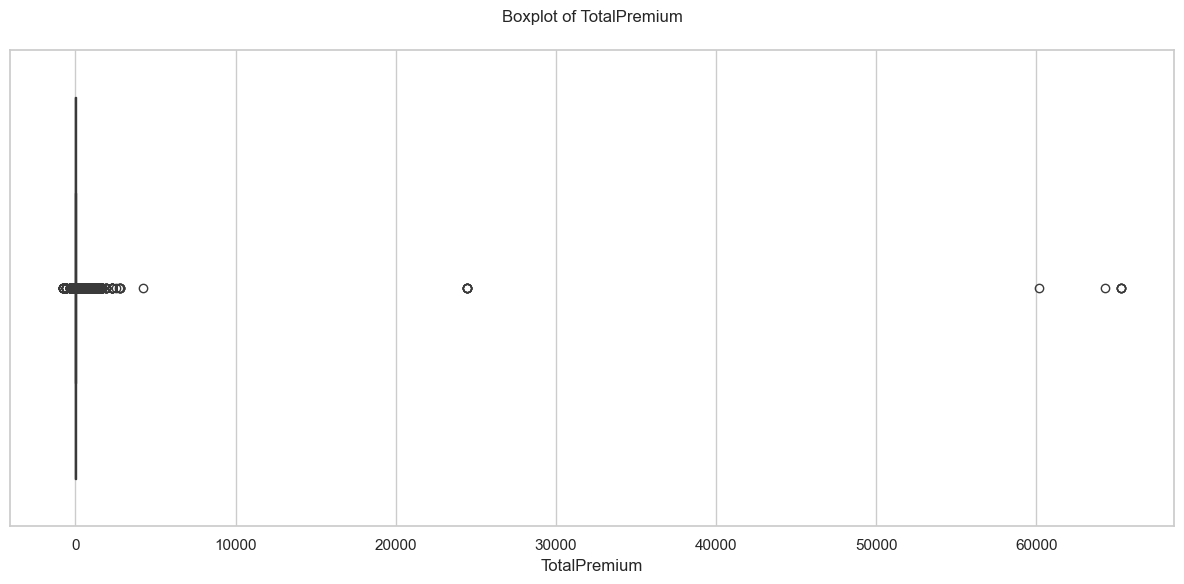

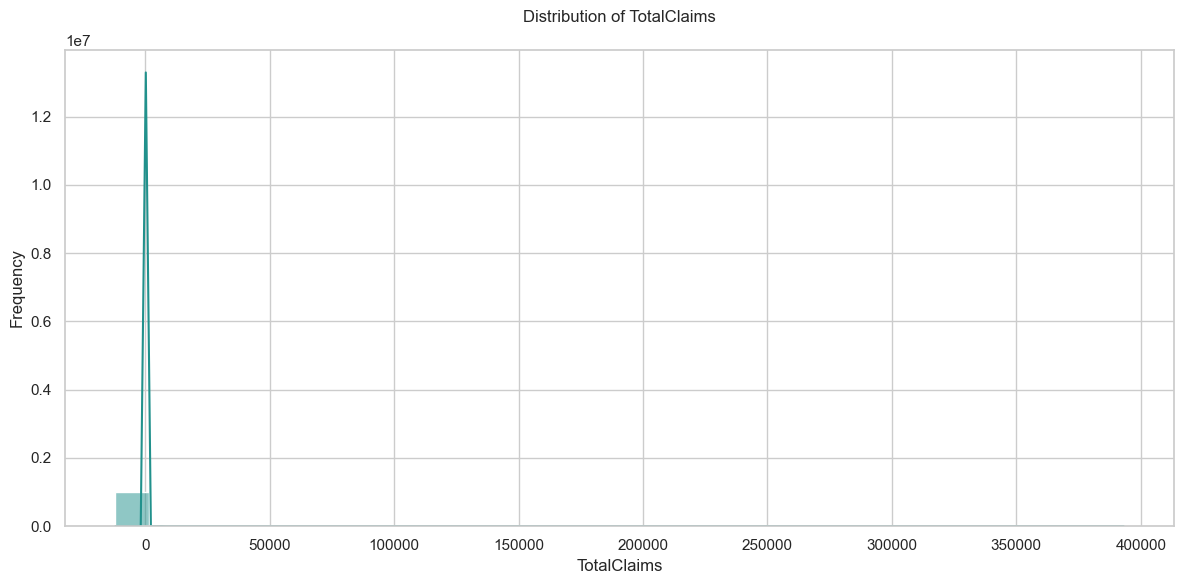

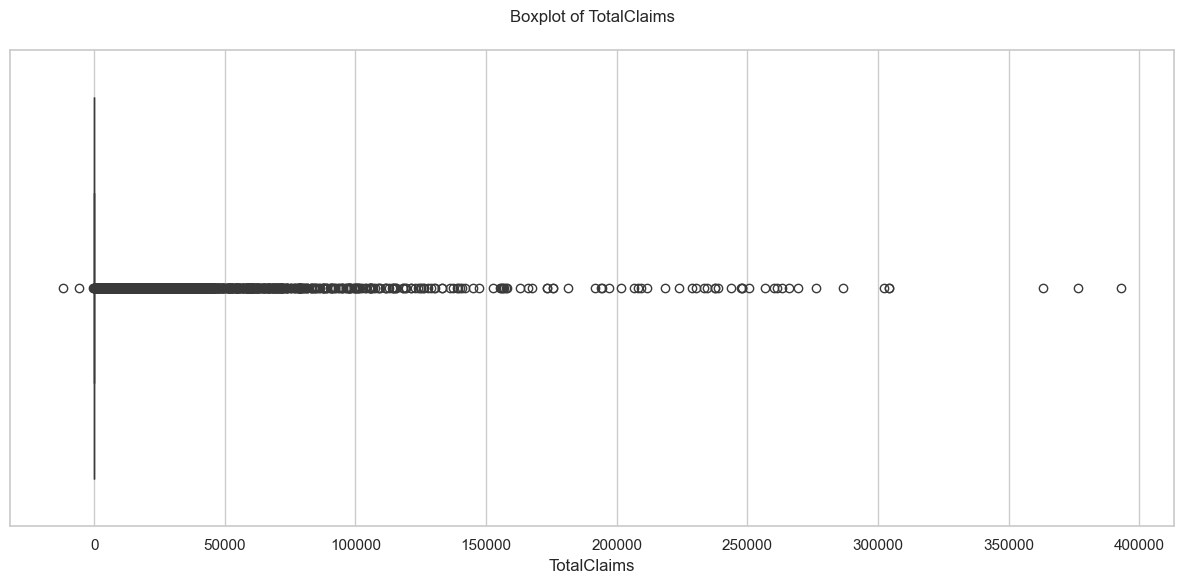

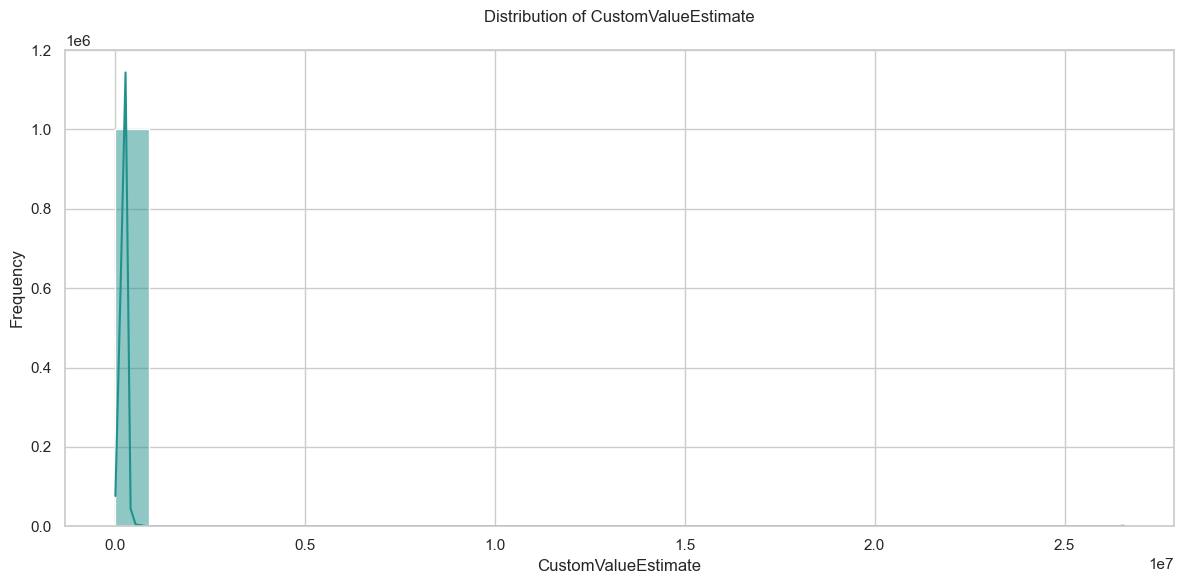

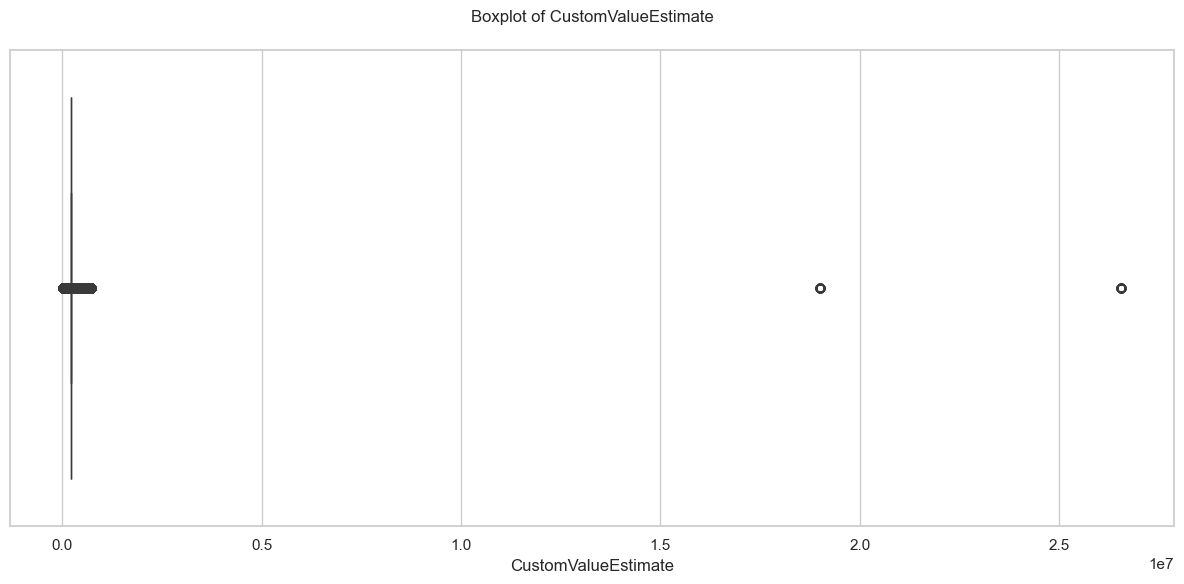

/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')


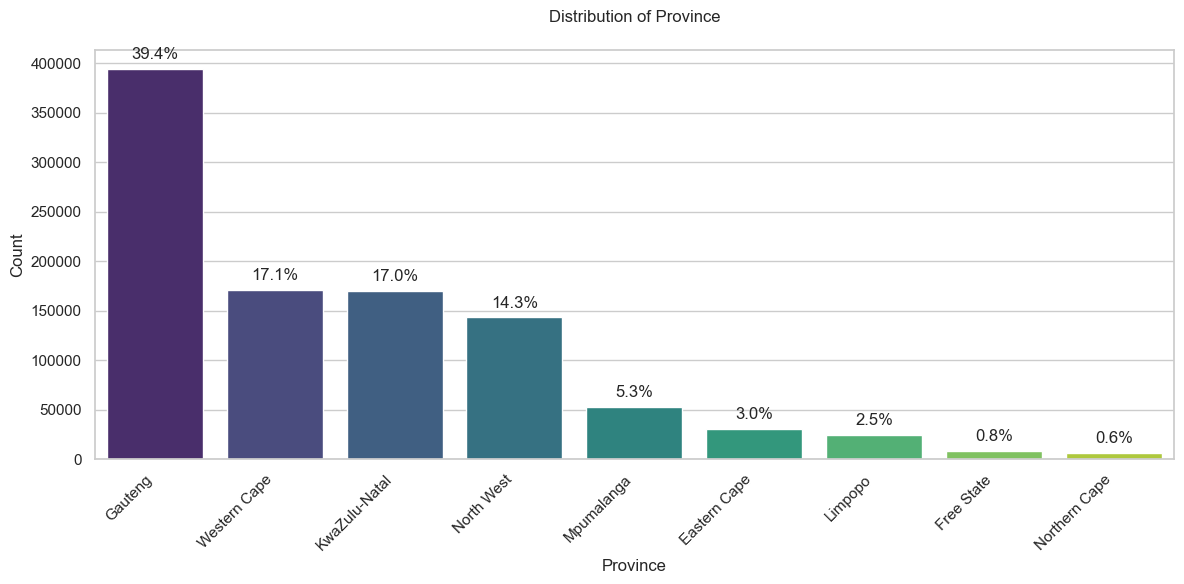

/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')


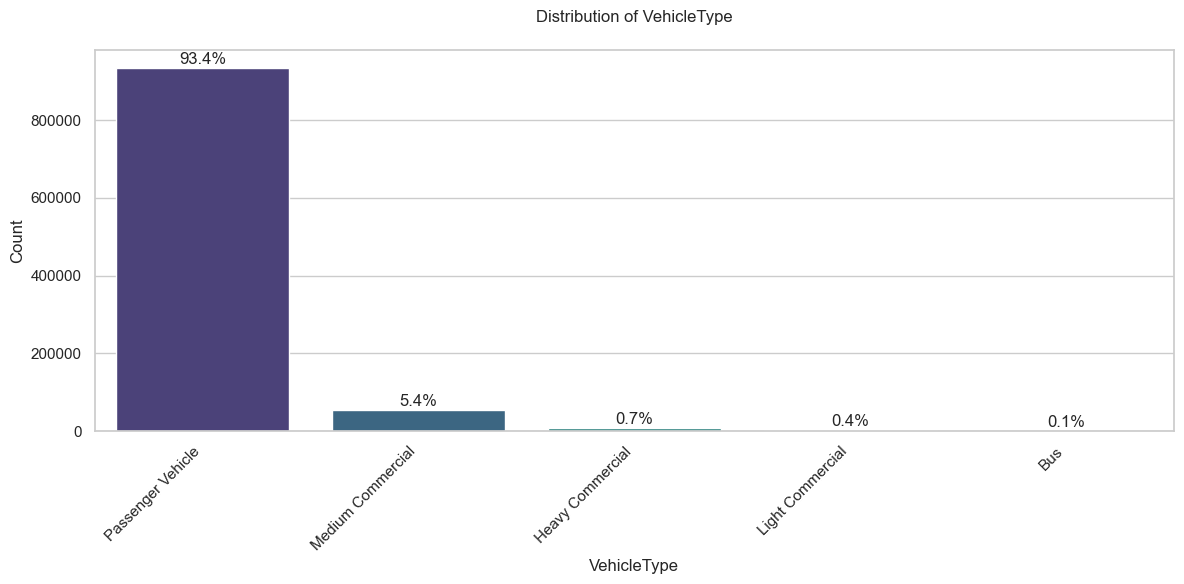

/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/Users/worash/Desktop/tenx/week3/car-insurance-predictive-model/src/features/plot_distributions.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')


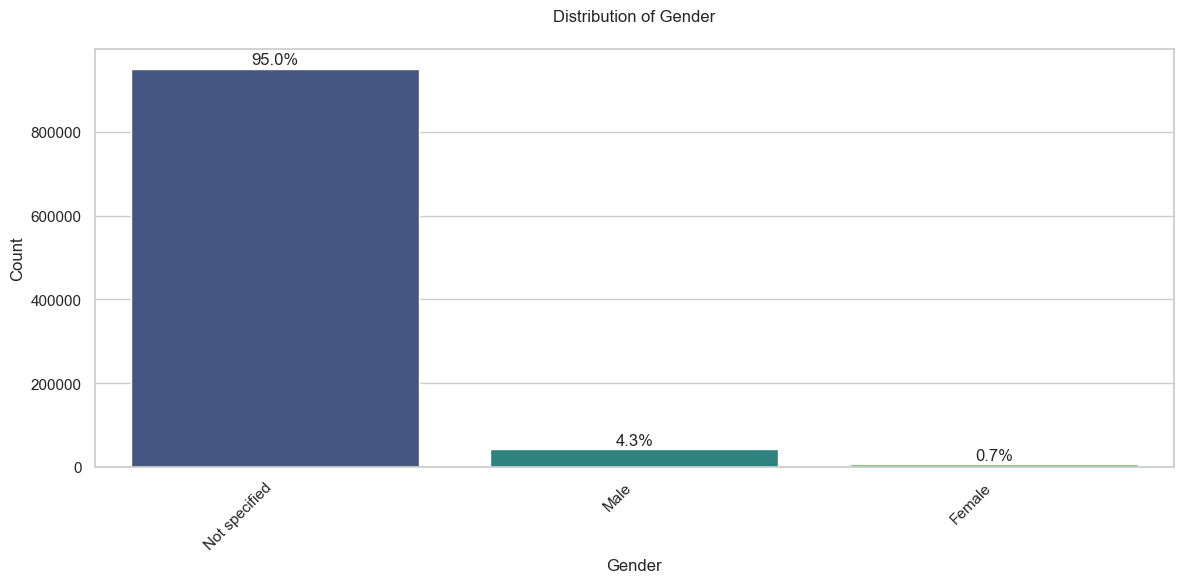

In [22]:
plot_distributions(
    insurance_df,
    numerical_cols=['TotalPremium', 'TotalClaims', 'CustomValueEstimate'],
    categorical_cols=['Province', 'VehicleType', 'Gender'],
    figsize=(12, 6),
    rotation=45
)


📊 Outlier Analysis for TotalClaims:
• Lower bound: 0.00
• Upper bound: 0.00
• Number of outliers: 2794 (0.28% of data)
• Min outlier value: -12002.41
• Max outlier value: 393092.11


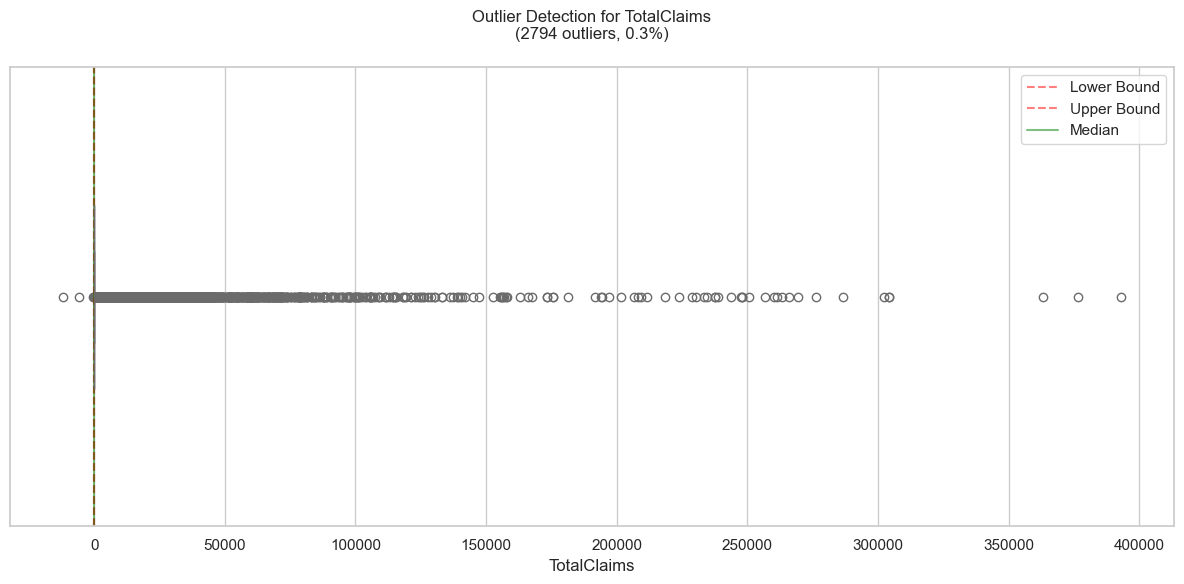

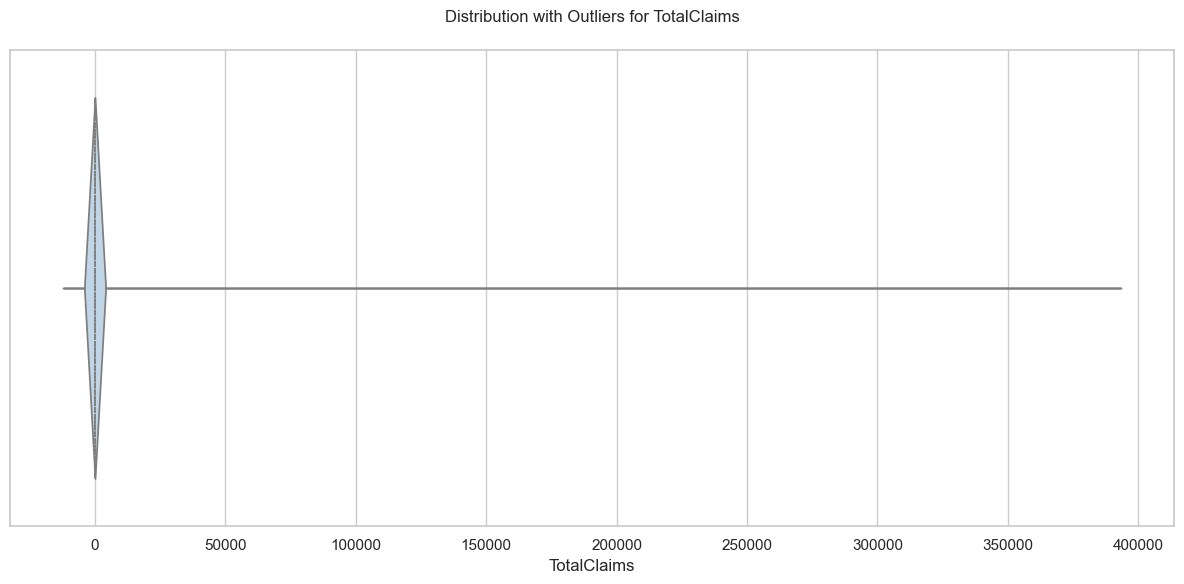


📊 Outlier Analysis for TotalPremium:
• Lower bound: -32.89
• Upper bound: 54.82
• Number of outliers: 209042 (20.90% of data)
• Min outlier value: -782.58
• Max outlier value: 65282.60


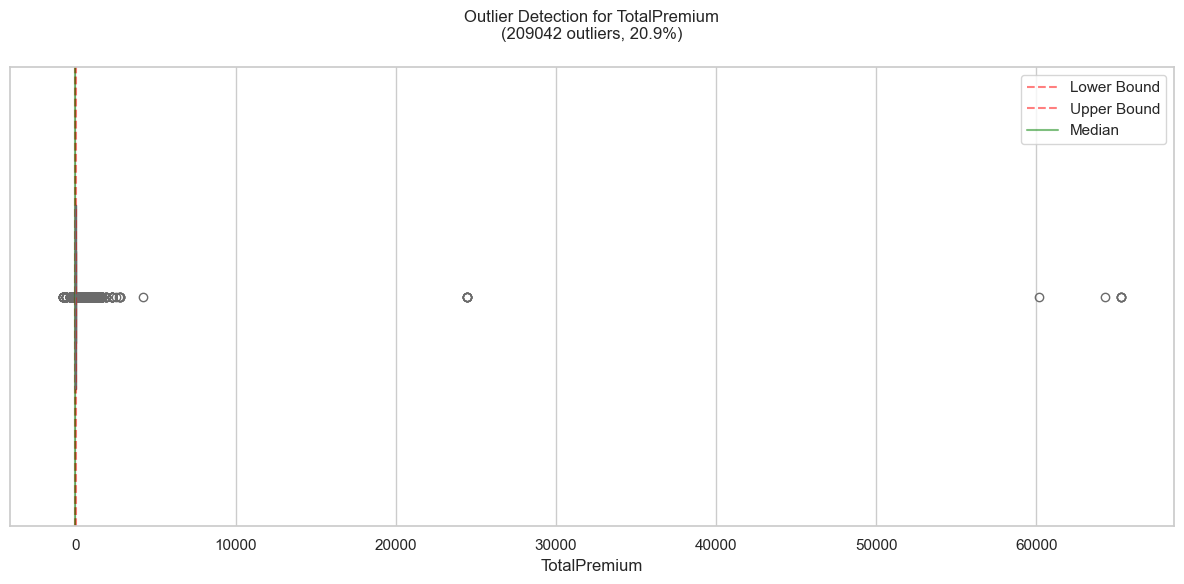

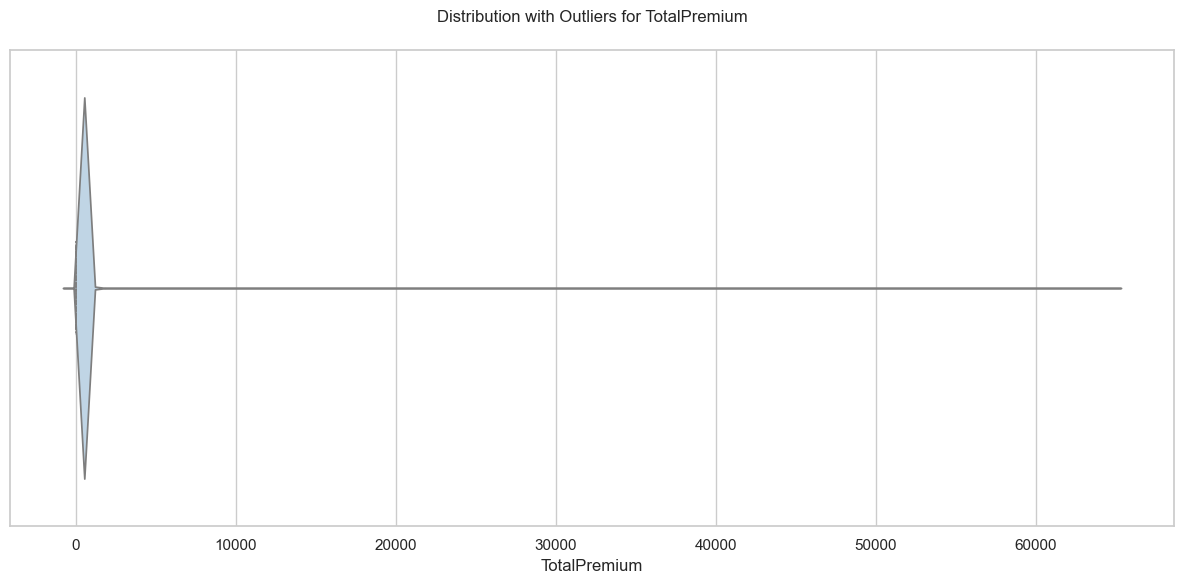


📊 Outlier Analysis for CustomValueEstimate:
• Lower bound: 220000.00
• Upper bound: 220000.00
• Number of outliers: 271001 (27.10% of data)
• Min outlier value: 20000.00
• Max outlier value: 26550000.00


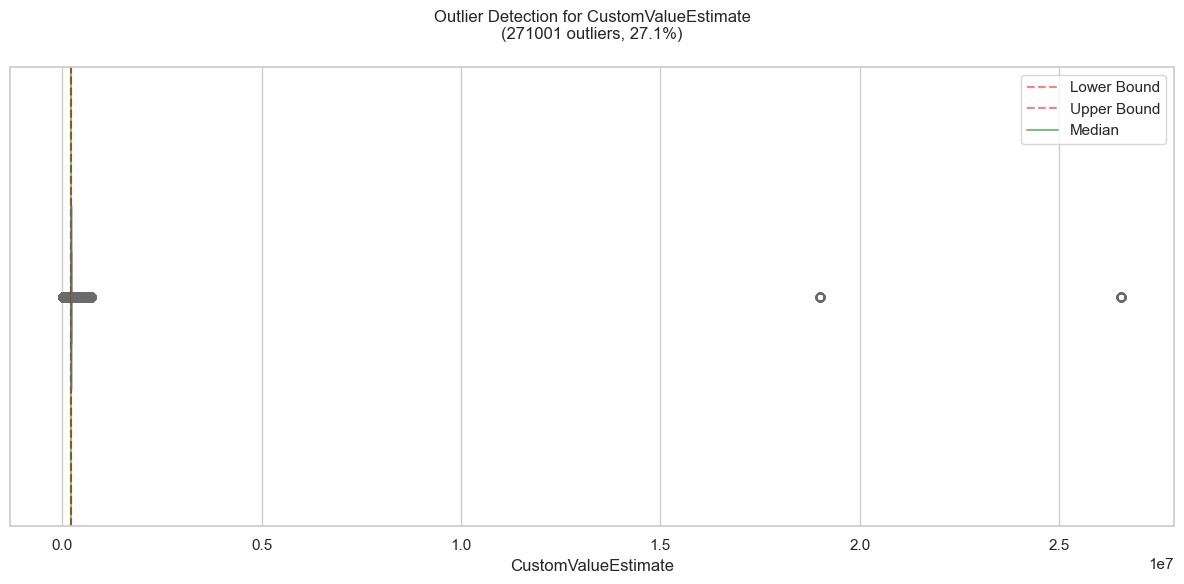

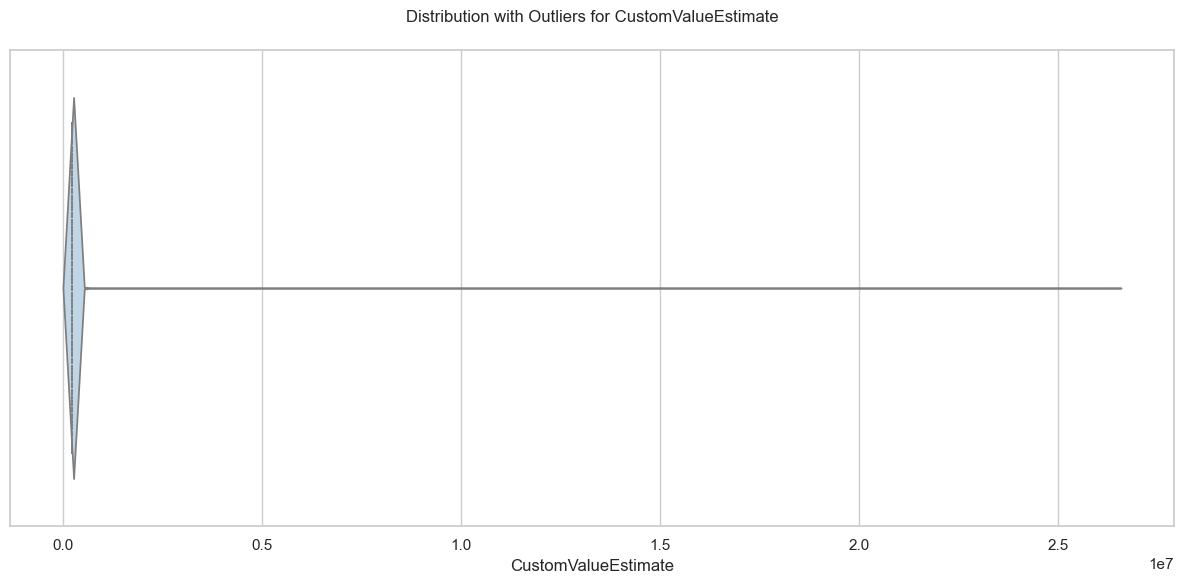

In [23]:

detect_outliers(
    insurance_df,
    numerical_cols=['TotalClaims', 'TotalPremium', 'CustomValueEstimate'],
    whis=1.5,
    show_fliers=True
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


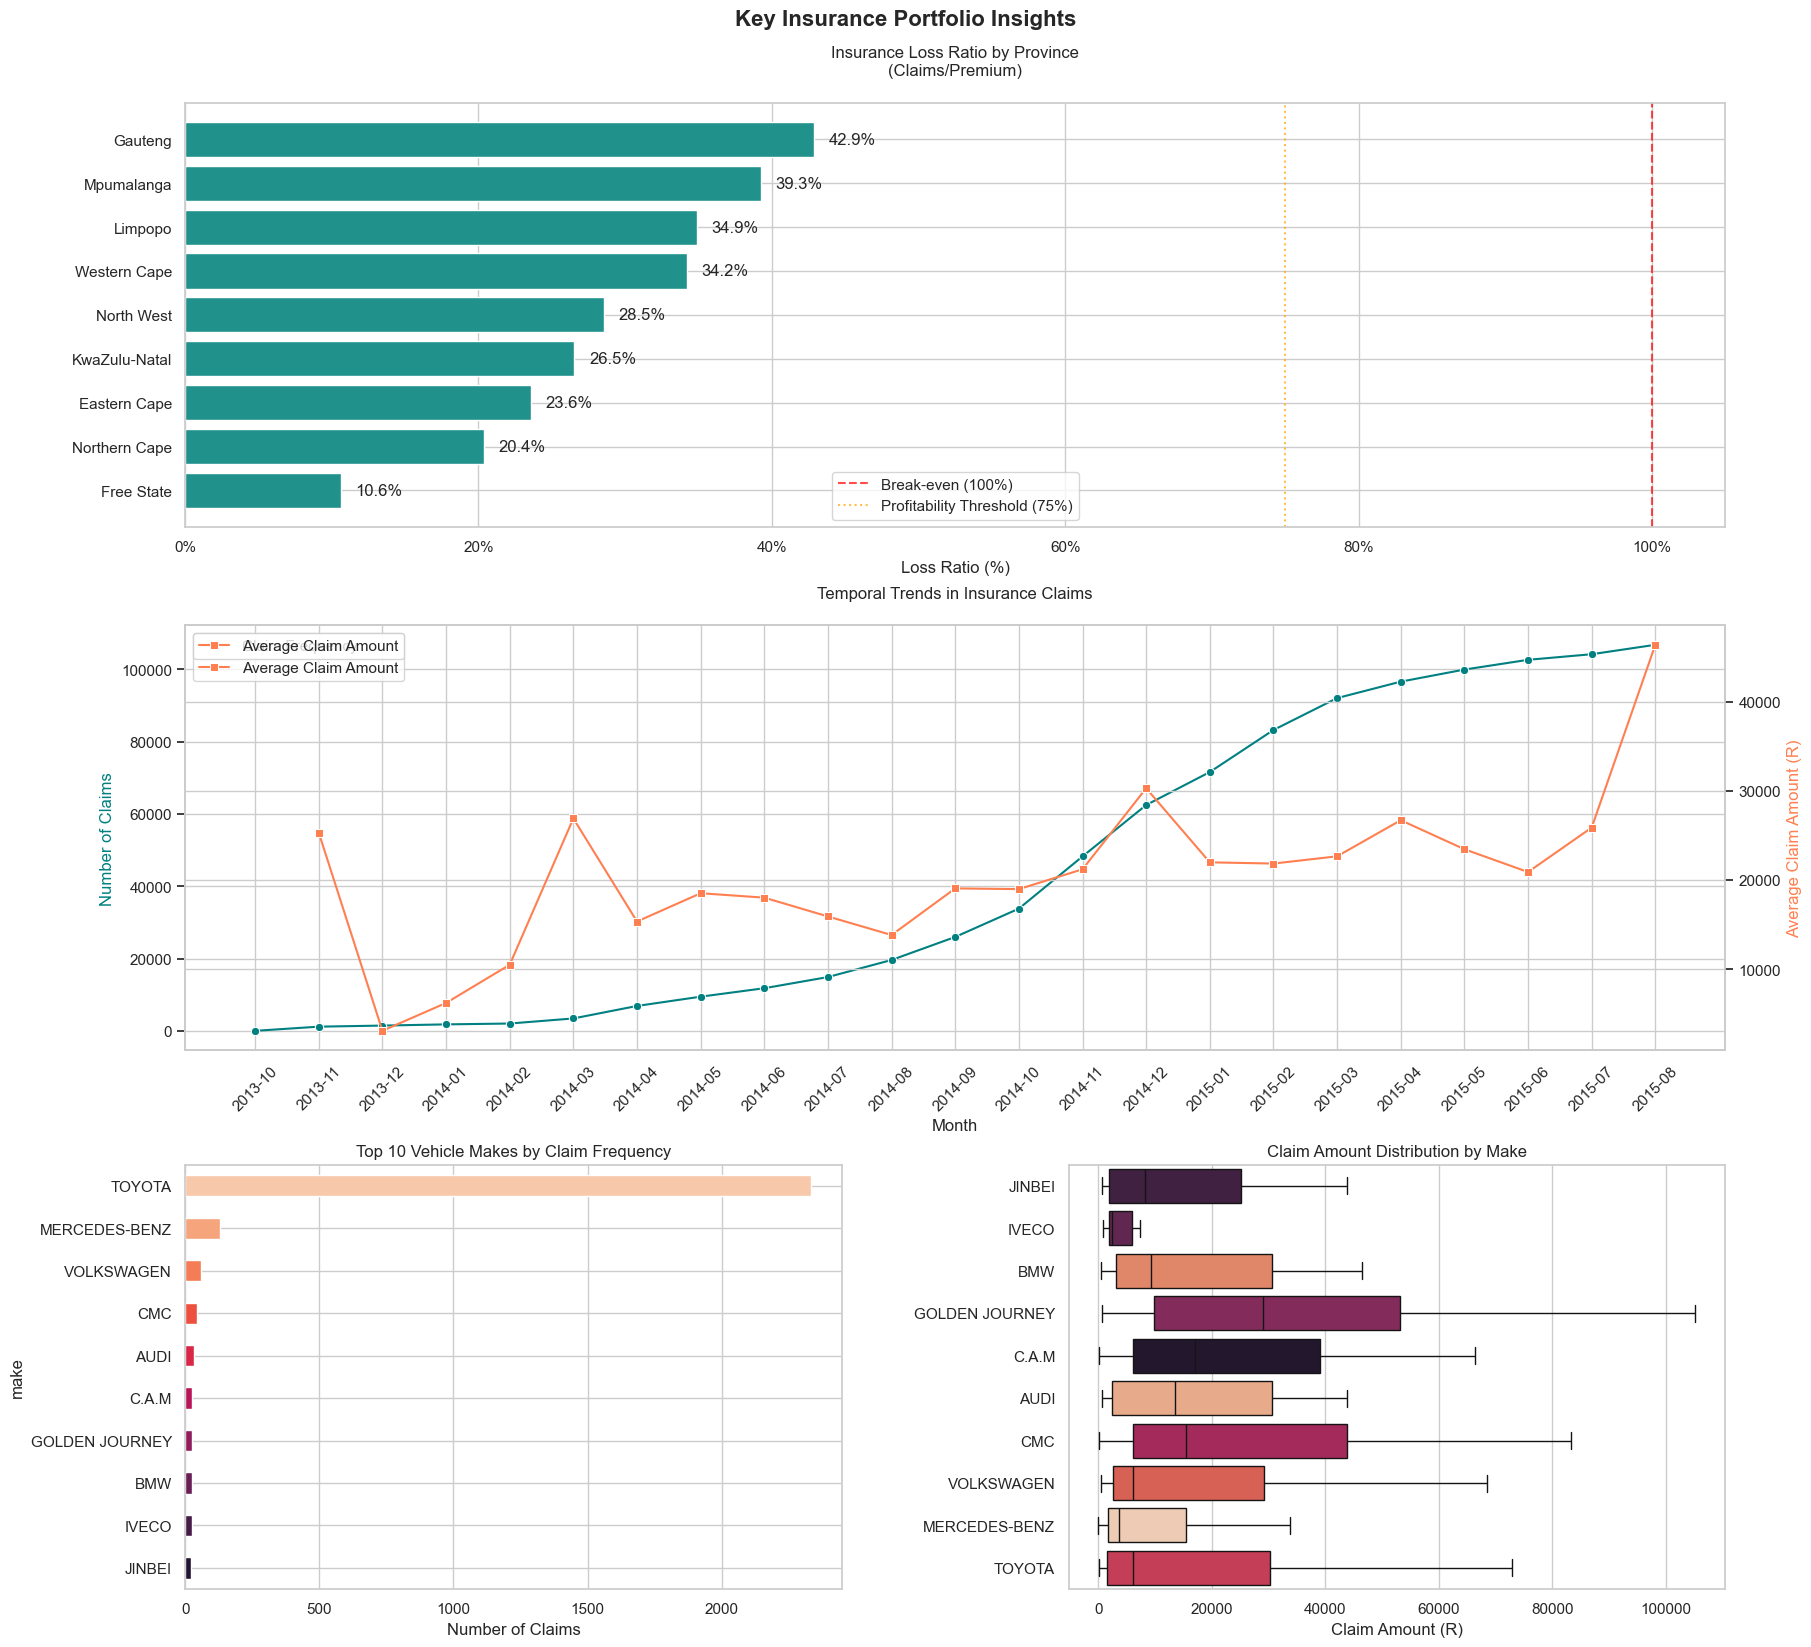

In [24]:
create_insightful_visuals(insurance_df)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


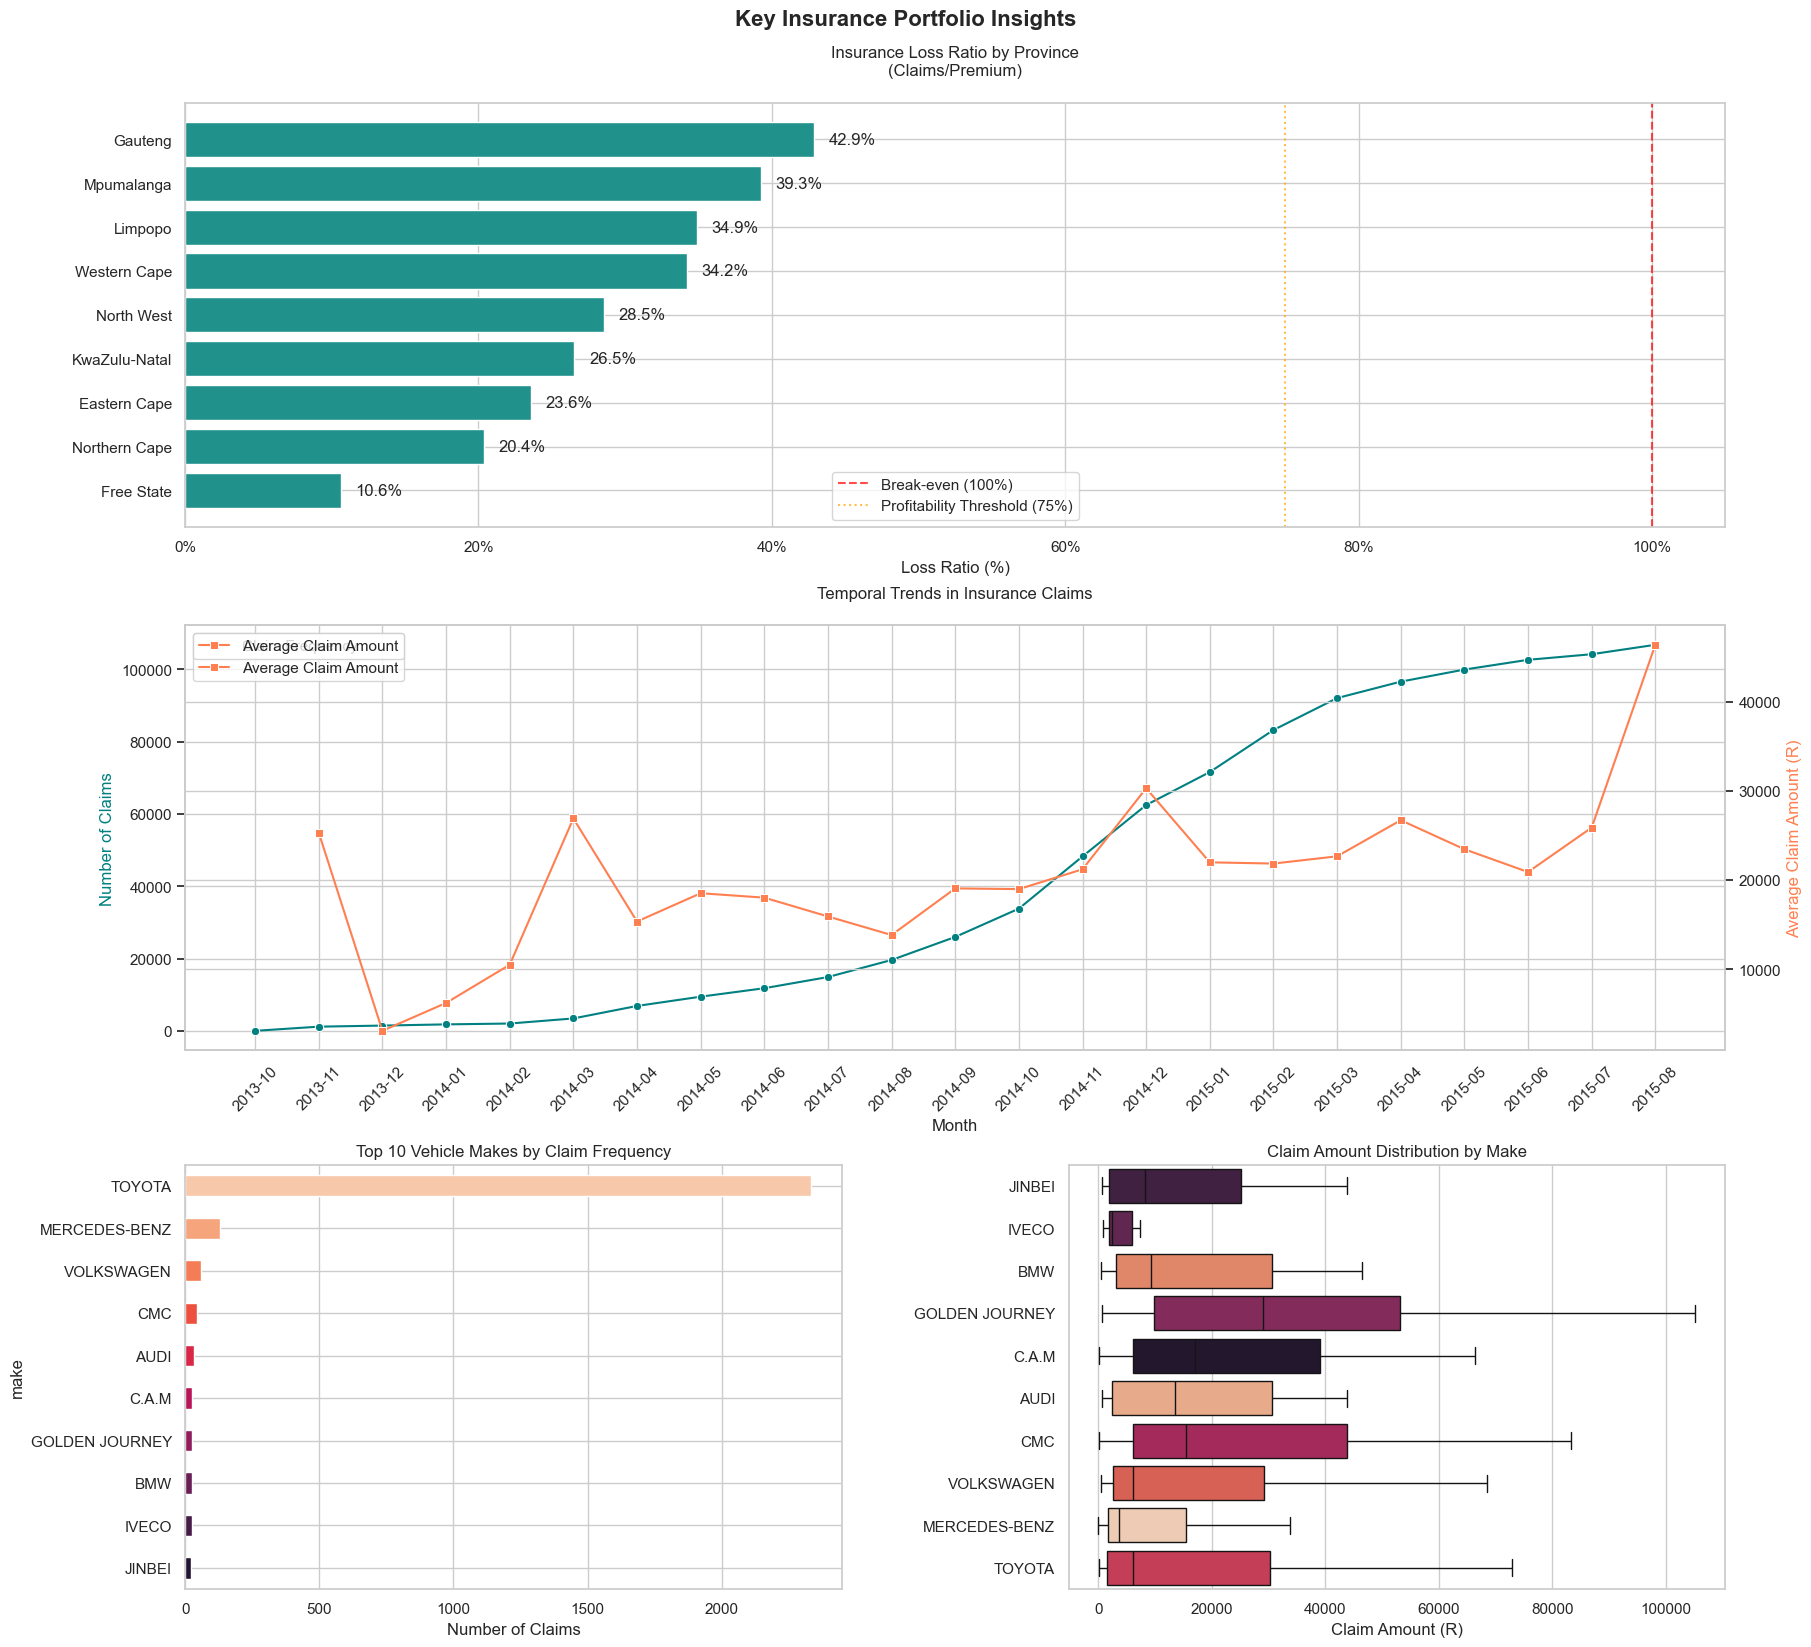

In [25]:
create_insightful_visuals(insurance_df)

In [26]:

zero_claim = insurance_df[insurance_df['TotalClaims'] == 0]
zero_claim['TotalClaims'].value_counts()

TotalClaims
0.0    997304
Name: count, dtype: int64

In [8]:
insurance_df['HasClaim']=insurance_df['TotalClaims']>0
insurance_df[insurance_df['HasClaim']==True].head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio,HasClaim
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,9.000000e-13,4.104000e-14,True
203,46222,4044,2014-10-01,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,2.294096e+03,NaN,True
284,82062,7174,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,2.040474e+03,9.304560e+01,True
1560,119591,8672,2015-04-01,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1213.889211,4.649221e+04,3.830021e+01,True
1779,50193,283,2014-10-01,False,,Close Corporation,Mr,English,Standard Bank,Current account,...,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,645.017456,2.651686e+04,4.111030e+01,True


In [28]:
# Calculate metrics
insurance_df['HasClaim'] = insurance_df['TotalClaims'] > 0

metrics = insurance_df.groupby(['Province','PostalCode', 'Gender']).agg(
    ClaimFrequency=('HasClaim', 'mean'),
    ClaimSeverity=('TotalClaims', 'mean'),

).reset_index()
metrics

,Province,PostalCode,Gender,ClaimFrequency,ClaimSeverity
0,Eastern Cape,4800,Not specified,0.000000,0.000000
1,Eastern Cape,4810,Not specified,0.000000,0.000000
2,Eastern Cape,4811,Not specified,0.000000,0.000000
3,Eastern Cape,4820,Not specified,0.000865,156.990310
4,Eastern Cape,4930,Not specified,0.000000,0.000000
...,...,...,...,...,...
978,Western Cape,8020,Male,0.001792,7.631296
979,Western Cape,8020,Not specified,0.001628,70.581749
980,Western Cape,8040,Not specified,0.000000,0.000000
981,Western Cape,8051,Not specified,0.003386,53.599224


In [29]:
import numpy as np

# 1. Create 'HasClaim' indicator
insurance_df['HasClaim'] = insurance_df['TotalClaims'] > 0

# 2. Aggregate initial metrics
# For ClaimSeverity, it's good practice to average only when claims exist,
# similar to how you did in the visualization code.
# np.where is used to handle potential division by zero if there are no claims in a group.
aggregated_df = insurance_df.groupby(['Province', 'PostalCode', 'Gender']).agg(
    # ClaimFrequency: Mean of 'HasClaim' (True=1, False=0) gives the proportion of policies with claims
    ClaimFrequency=('HasClaim', 'mean'),
    # TotalPremiums: Sum of premiums for the group
    TotalPremiums=('TotalPremium', 'sum'),
    # TotalClaimAmounts: Sum of total claims for the group
    TotalClaimAmounts=('TotalClaims', 'sum')
).reset_index()

# 3. Calculate ClaimSeverity and Margin AFTER initial aggregation
# ClaimSeverity: Total Claim Amounts / Number of claims (which is TotalPremiums * ClaimFrequency)
# Or, more directly, sum of claims / count of claims (if you want the average only for policies that had claims)
# If you want average claim for all policies in the group (even those with 0 claims), use the original TotalClaims mean.
# Based on your previous context, ClaimSeverity was average claim amount *per claim*.
# To get that, we need to know the *count of claims* in each group.

# Let's adjust step 2 to get the count of claims too, for accurate ClaimSeverity as 'average amount per claim'
aggregated_df_refined = insurance_df.groupby(['Province', 'PostalCode', 'Gender']).agg(
    ClaimFrequency=('HasClaim', 'mean'), # Proportion of policies with claims
    TotalPremiums=('TotalPremium', 'sum'), # Total premiums for the group
    TotalClaimAmounts=('TotalClaims', 'sum'), # Total amount claimed for the group
    ClaimCount=('HasClaim', 'sum') # Number of actual claims (where TotalClaims > 0)
).reset_index()

# Now calculate ClaimSeverity and Margin
# ClaimSeverity: TotalClaimAmounts / ClaimCount. Handle division by zero for groups with no claims.
aggregated_df_refined['ClaimSeverity'] = np.where(
    aggregated_df_refined['ClaimCount'] > 0,
    aggregated_df_refined['TotalClaimAmounts'] / aggregated_df_refined['ClaimCount'],
    0  # Set to 0 or NaN if there are no claims in the group
)

# Margin: TotalPremiums - TotalClaimAmounts
aggregated_df_refined['Margin'] = aggregated_df_refined['TotalPremiums'] - aggregated_df_refined['TotalClaimAmounts']

# Select and reorder columns for a clean output
final_metrics_df = aggregated_df_refined[['Province', 'PostalCode', 'Gender', 'ClaimFrequency', 'ClaimSeverity', 'Margin']]

print(final_metrics_df)

         Province  PostalCode         Gender  ClaimFrequency  ClaimSeverity  \
0    Eastern Cape        4800  Not specified        0.000000       0.000000   
1    Eastern Cape        4810  Not specified        0.000000       0.000000   
2    Eastern Cape        4811  Not specified        0.000000       0.000000   
3    Eastern Cape        4820  Not specified        0.000865  181480.798246   
4    Eastern Cape        4930  Not specified        0.000000       0.000000   
..            ...         ...            ...             ...            ...   
978  Western Cape        8020           Male        0.001792    4258.263158   
979  Western Cape        8020  Not specified        0.001628   43347.277043   
980  Western Cape        8040  Not specified        0.000000       0.000000   
981  Western Cape        8051  Not specified        0.003386   15829.637427   
982  Western Cape        8060  Not specified        0.003643   22872.807018   

            Margin  
0     11933.872827  
1        